# Wisconsin breast cancer data set from SciKit Learn

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

In [3]:
data = load_breast_cancer()

 ## dataset description 
 the `DESCR` field on the dataset gets the dataset field descriptions (this works for all scikit-learn datasets)

In [4]:
data.DESCR.split("\n")

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 569',
 '',
 '    :Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 '    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features w

## Exploring the data

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
X = data.data

In [7]:
y = data.target

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
X.shape

(569, 30)

In [11]:
features = X
features.shape

(569, 30)

## Analysing the data

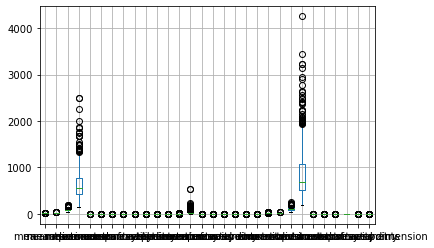

In [12]:

df = pd.DataFrame(X, columns=data.feature_names)
df['result'] = y.tolist()
boxplot = df.boxplot(column=data.feature_names.tolist())

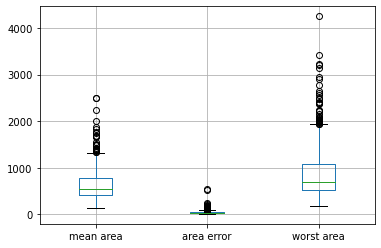

In [13]:
indices = [3,13,23]
# indices = [0,2,13]
select_feature_names = data.feature_names[indices]
boxplot = df.boxplot(column=select_feature_names.tolist())

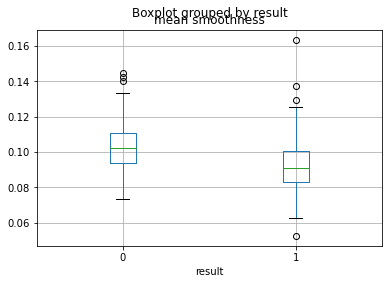

In [14]:
indices = [4]
# indices = [0,2,13]
select_feature_names = data.feature_names[indices]
boxplot = df.boxplot(column=select_feature_names.tolist(), by='result')

In [15]:
select_feature_names.tolist()

['mean smoothness']

In [16]:
# boxplot = df.boxplot(column=data.feature_names[1:3].tolist())
# df = pd.DataFrame(X[:,1:3], columns=data.feature_names[1:3])

In [17]:
from sklearn.linear_model import LinearRegression

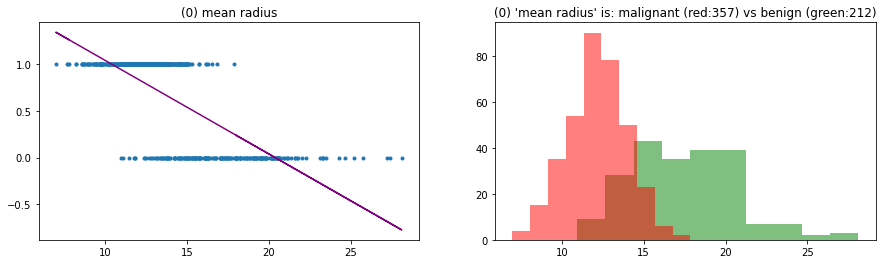

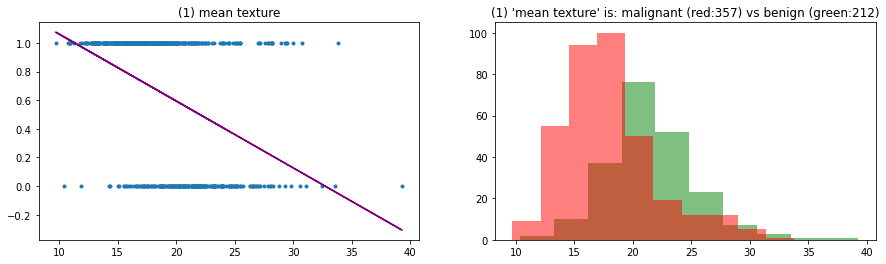

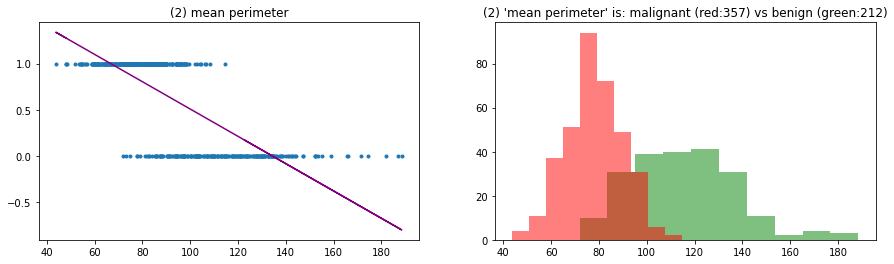

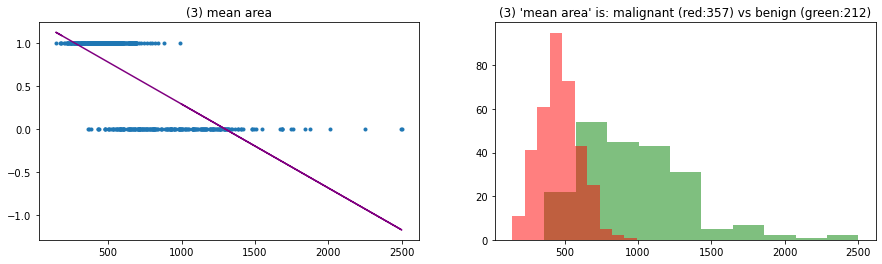

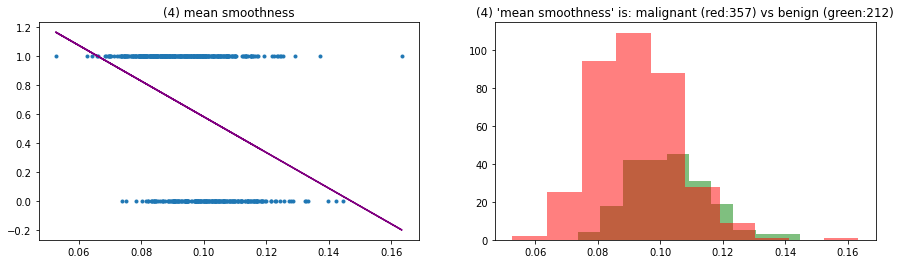

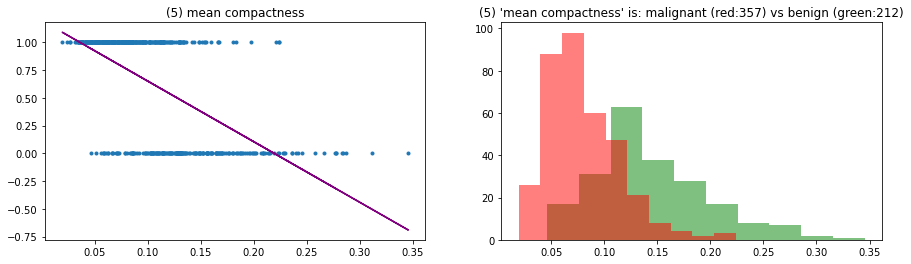

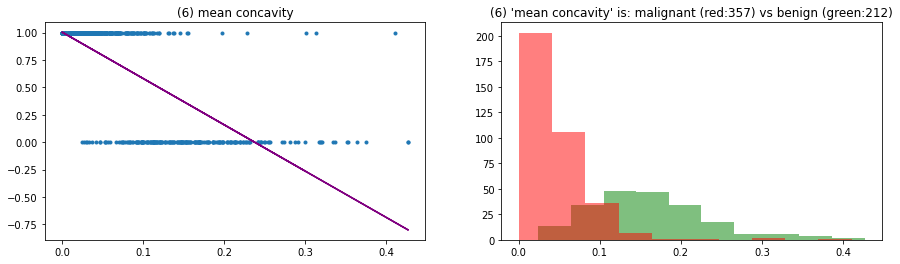

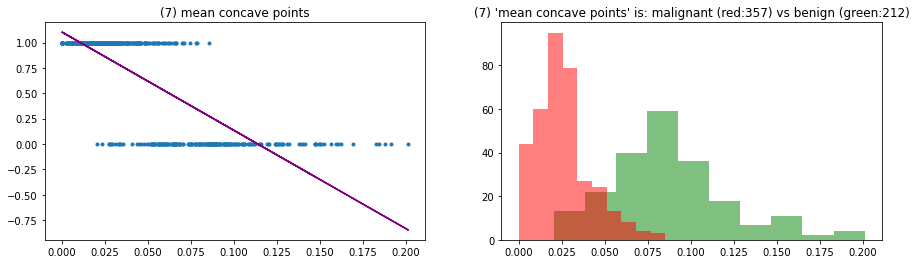

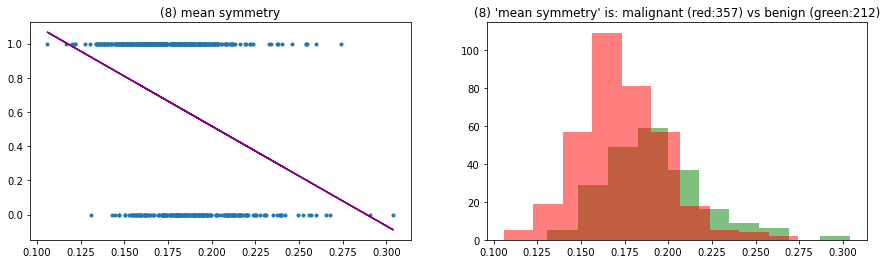

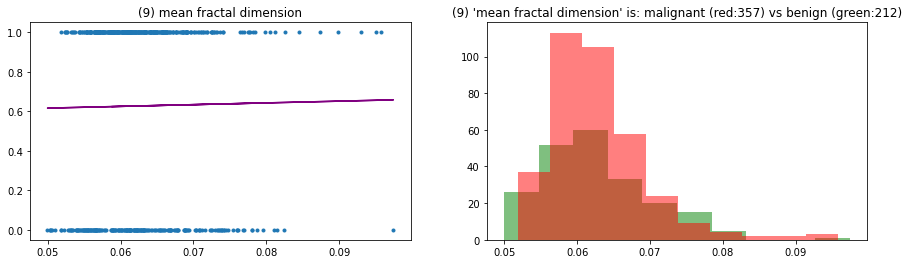

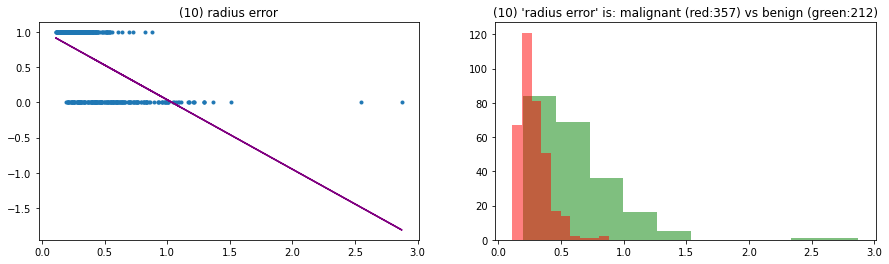

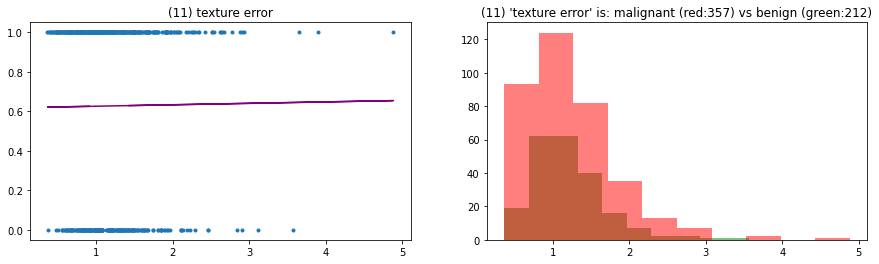

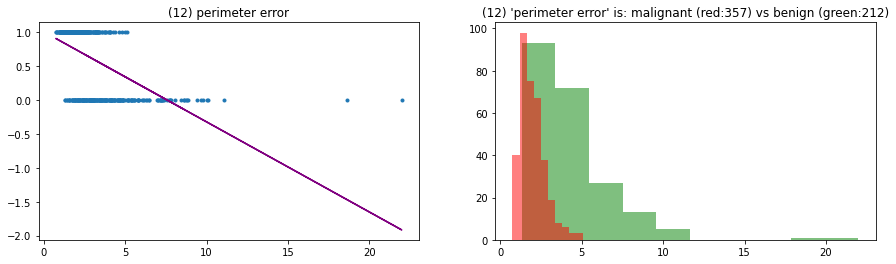

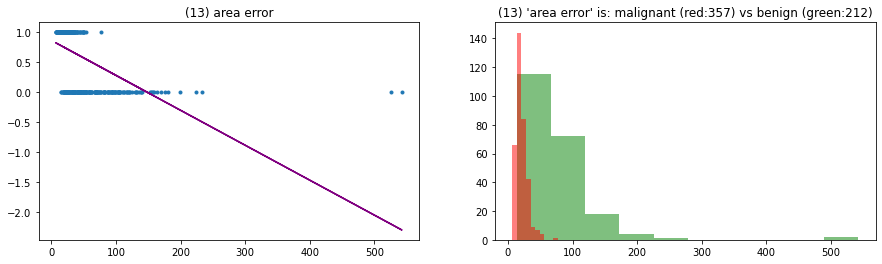

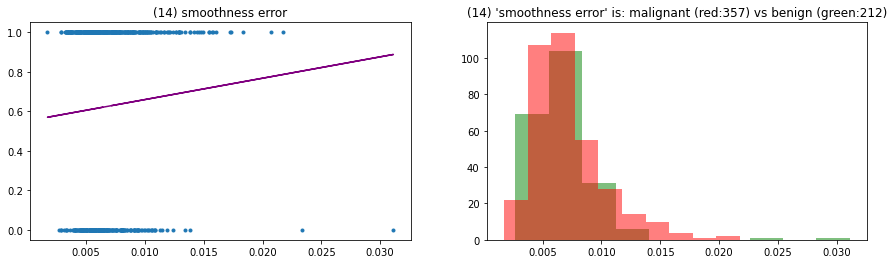

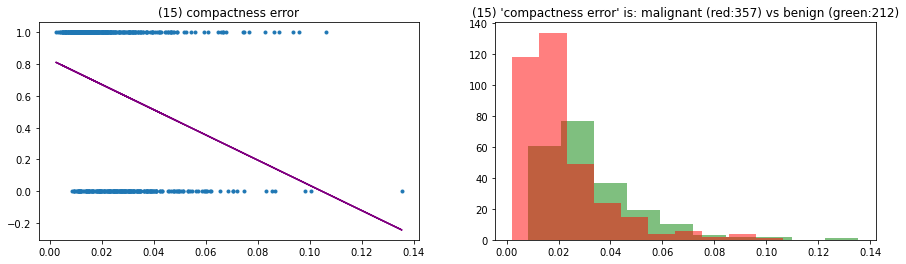

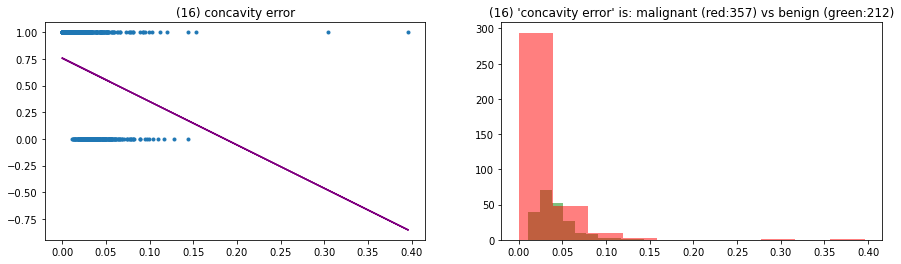

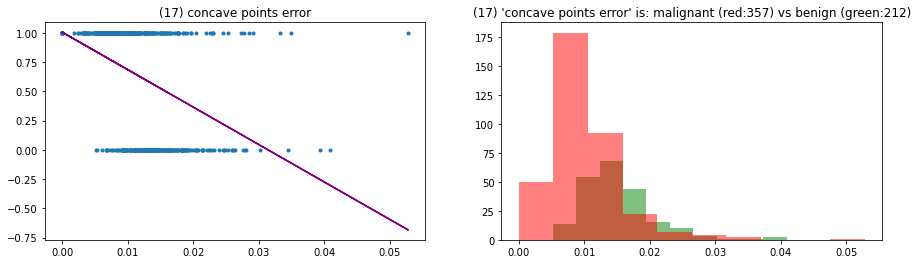

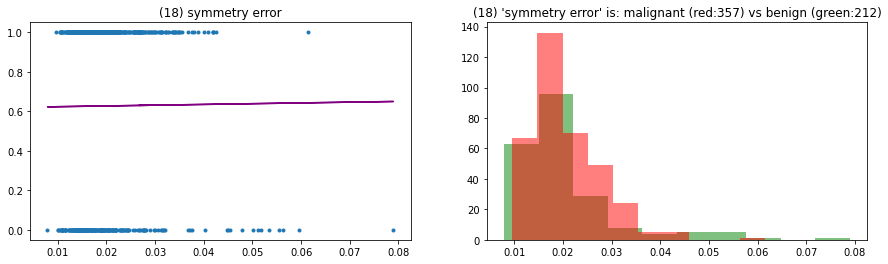

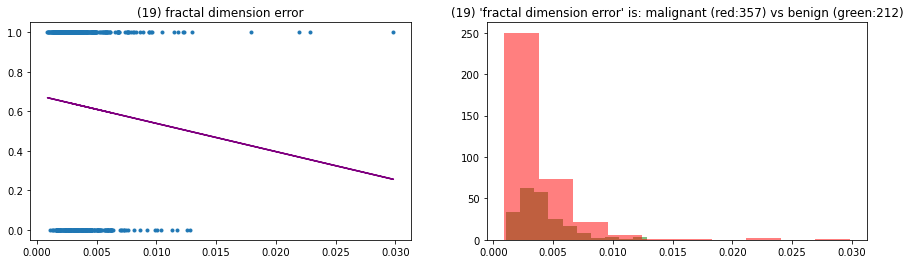

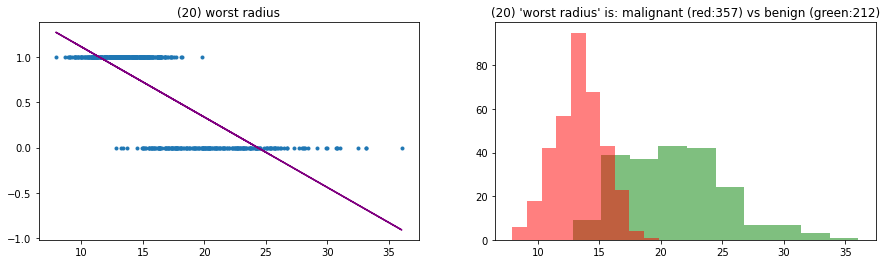

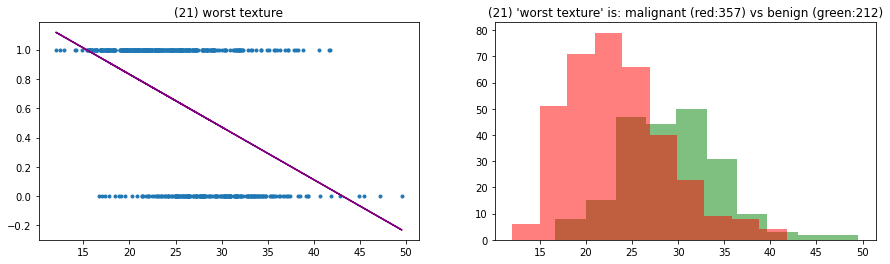

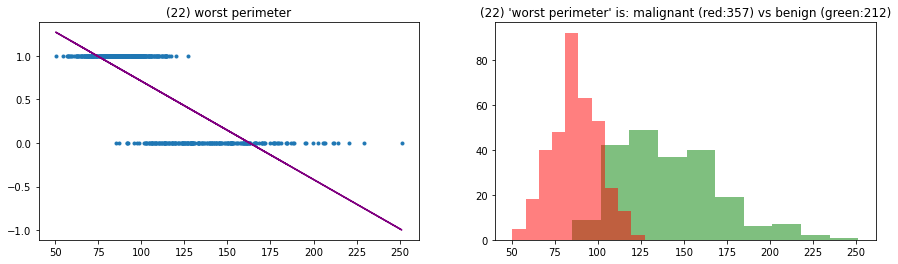

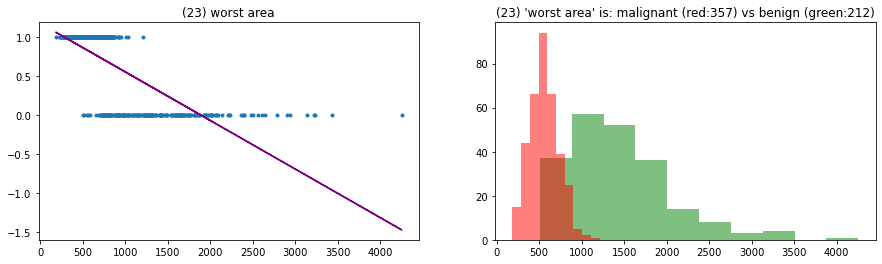

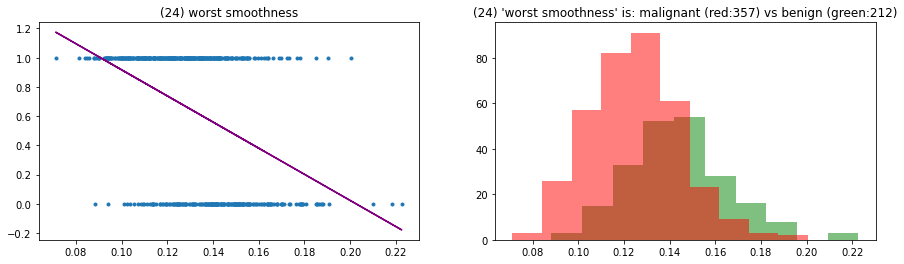

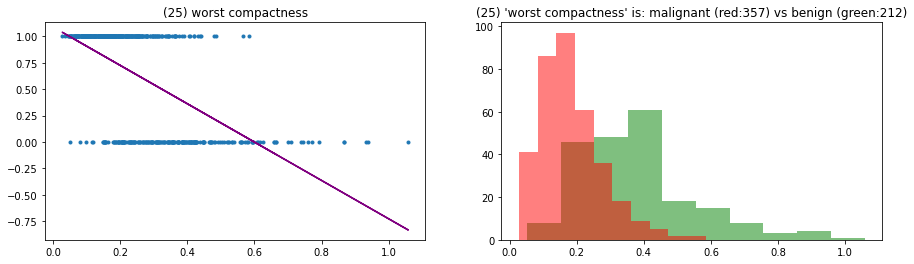

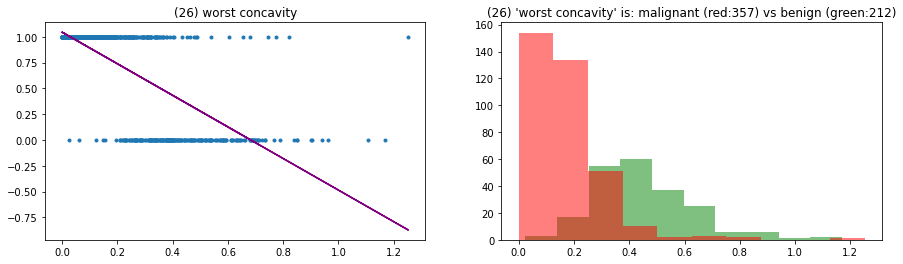

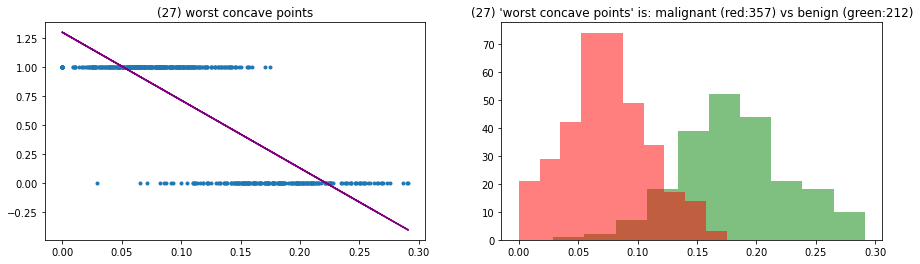

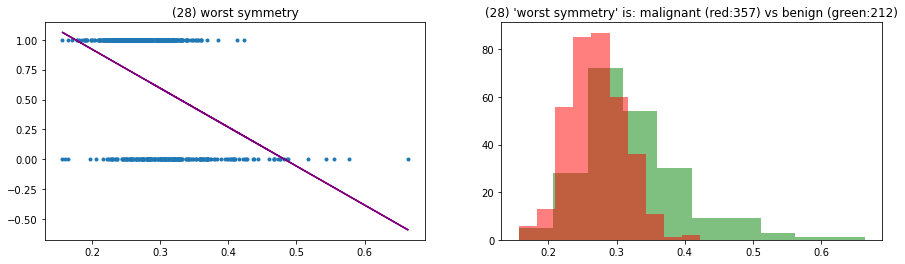

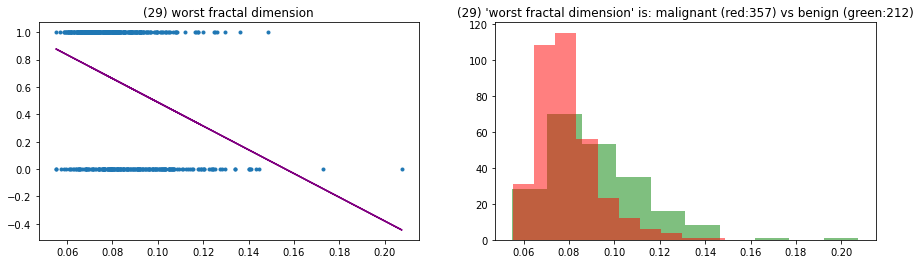

In [18]:

for idx, feature in enumerate(data.feature_names.tolist()):
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))

    lx = df[feature].tolist()
    ly = y
    
    ldf = pd.DataFrame({ feature: lx, 'is_malignant': ly })
    ldf.sort_values(by=[feature])
    X = ldf[feature]
    Y = ldf['is_malignant']
    
    axs[0].scatter(X.tolist(), Y.tolist(), marker='.')
    lrX = X.to_numpy().reshape(-1,1) 
    lrY = Y.to_numpy().reshape(-1,1)
    axs[0].plot( lrX, LinearRegression().fit(lrX, lrY).predict(lrX), 'purple' )
    axs[0].set_title('(' + str(idx) + ') ' + feature)

    benign = ldf[feature][ldf['is_malignant'] == 0].tolist()
    malignant = ldf[feature][ldf['is_malignant'] == 1].tolist()
    
    plt.title('(' + str(idx) + ') \'' + feature + '\' is: malignant (red:' + str(len(malignant)) + ') vs benign (green:' + str(len(benign)) + ')')
    axs[1].hist(benign, color = 'green', alpha=0.5)
    axs[1].hist(malignant, color = 'red', alpha=0.5)  
    plt.show()



## Selecting candidates

In [19]:
candidate_features = [ 'mean radius', 'mean perimeter', 'mean area', 'mean concavity' , 'mean concave points',  'worst radius', 'worst perimeter', 'worst area', 'worst concavity' , 'worst concave points' ]

## training on candidate features

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train_validation, X_test, y_train_validation, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25, random_state=42)



In [22]:
len(X_train), len(X_validation), len(X_test)

(341, 114, 114)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
!mkdir -p target

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="target/bcd.dot",
               feature_names=data.feature_names,
               class_names=data.target_names,
               rounded=True,
               filled=True)

In [28]:
# dot will convert the tree from a .dot file to a .png
# In case you don't have dot installed, the png is already
# in your zip file
!dot -Tpng target/bcd.dot -o target/bcd.png
!open target/bcd.png

In [29]:
tree_clf.score(X_validation, y_validation)

0.9210526315789473

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
RandomForestClassifier()

RandomForestClassifier()